# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 3/23/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 3/23/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,301,38928341,0.8
Albania,7638,2877800,265.4
Algeria,1806,43851043,4.1
Andorra,502,77265,649.7
Angola,660,32866268,2.0
Antigua and Barbuda,218,97928,222.6
Argentina,99576,45195777,220.3
Armenia,9822,2963234,331.5
Australia,147,25459700,0.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Estonia,19965,1326539,1505.0
San Marino,448,33938,1320.1
Czechia,139723,10708982,1304.7
Montenegro,7313,628062,1164.4
Hungary,110916,9660350,1148.2
Jordan,111525,10203140,1093.0
Malta,3562,441539,806.7
Seychelles,766,98340,778.9
Serbia,67266,8737370,769.9


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

3/19/21    2654734.0
3/20/21    2669233.0
3/21/21    2670001.0
3/22/21    2678262.0
3/23/21    2699231.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

3/10/21        NaN
3/11/21     4745.0
3/12/21    12770.0
3/13/21    10568.0
3/14/21     8978.0
3/15/21     6543.0
3/16/21    17679.0
3/17/21     7705.0
3/18/21    28489.0
3/19/21    15476.0
3/20/21    14499.0
3/21/21      768.0
3/22/21     8261.0
3/23/21    20969.0
Name: Germany, dtype: float64

<AxesSubplot:>

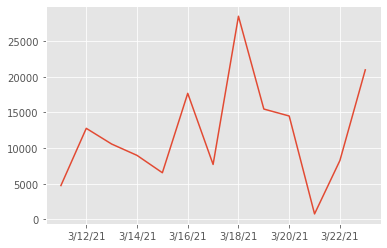

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

187.92383194656207